# Lecture 8 - Conjugate Prior Relationship; Online Update of Prior

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

$$\arg_{\mathbf{w}} \max P(\mathbf{t}|\mathbf{w})$$

In **Maximum Likelihood Estimation** we *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{t}|\mathbf{w})$. We find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

* MLE focuses on maximizing the data likelihood, which *usually* provides a pretty good estimate

* A common trick to maximize the data likelihood is to maximize the log likelihood

* MLE is purely data driven 

* MLE works best when we have lots and lots of data

* MLE will likely overfit when we have small amounts of data or, at least, becomes unreliable

* It estimates relative frequency for our model parameters. Therefore it needs incredibly large amounts of data (infinite!) to estimate the true likelihood parameters
    * This is a problem when we want to make inferences and/or predictions outside the range of what the training data has learned

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

\begin{align}
& \arg_{\mathbf{w}} \max P(\mathbf{t}|\mathbf{w})P(\mathbf{w}) \\ 
& \propto \arg_{\mathbf{w}} \max P(\mathbf{w}|\mathbf{t})
\end{align}

In **Maximum A Posteriori** we *find the set of parameters* that **maximize** the the posterior probability $P(\mathbf{w}|\mathbf{t})$. We find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of.

* MAP focuses on maximizing the posterior probability - data  likelihood with a prior

* A common trick to maximize the posterior probability is to maximize the log likelihood

* MAP is data driven 

* MAP is mostly driven by the prior beliefs

* MAP works great with small amounts of data *if* our prior was chosen well

* We need to assume and select a distribution for our prior beliefs
    * A wrong choice of prior distribution can impact negatively our model estimation
    
* When we have lots and lots of data, the data likelihood will take over and the posterior will depend less and less on the prior

---

## Example

From last class, we illustrated the example where our input dataset $\{x_i\}_{i=1}^N$ is binary, where $x_i=\{0,1\}, \forall i$. 

For each data sample $x_i$, we modeled its data likelihood as the Bernoulli distribution with parameter $\mu$, i.e.

\begin{align*}
x_i \sim \text{Bernoulli}(\mu)
\end{align*}

Furthermore, we assume that each sample is independent of each other. Hence our dataset is a collection of i.i.d. samples.

**MLE Approach**

The MLE finds the solution for the parameter $\mu$ by maximizing the data likelihood. 

The observed data likelihood can be written as:

\begin{align*}
\mathcal{L}_{\text{MLE}}^0 &= \prod_{i=1}^N \mu^{x_i}(1-\mu)^{1-x_i}
\end{align*}

The **MLE** solution for the unknown parameter to be:

\begin{align*}
\mu_{\text{MLE}} = \frac{\sum_{i=1}^N x_i}{N}
\end{align*}

**MAP Approach**

The MAP finds the solution for the parameter $\mu$ by maximizing the data likelihood times a prior probability on the parameter/s. 

Considering the Beta distribution as the prior probability for the parameter, the observed posterior can be written as:

\begin{align*}
\mathcal{L}_{\text{MAP}}^0 &= \left(\prod_{i=1}^N \mu^{x_i}(1-\mu)^{1-x_i} \right)\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1} (1-\mu)^{\beta-1}\\
&\propto \left(\prod_{i=1}^N \mu^{x_i}(1-\mu)^{1-x_i} \right)\mu^{\alpha-1} (1-\mu)^{\beta-1}\\
&= \mu^{\sum_{i=1}^N x_i+\alpha-1} (1-\mu)^{N-\sum_{i=1}^N x_i+\beta-1}
\end{align*}

The **MAP** solution for the unknown parameter to be:

\begin{align*}
\mu_{\text{MAP}} = \frac{\sum_{i=1}^N x_i+\alpha-1}{N + \alpha + \beta -2}
\end{align*}

In [1]:
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

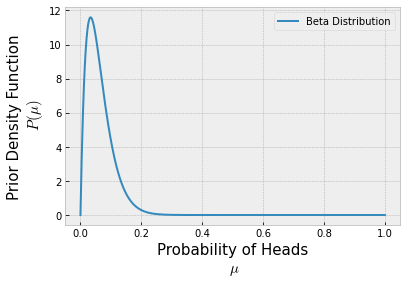

In [4]:
a = 2
b = 30
Beta = stats.beta(a,b)
x = np.linspace(0,1,1000)

plt.plot(x, Beta.pdf(x), label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\mu)$',fontsize=15);

In [5]:
import scipy.stats as stats

trueMU = 0.5 # 0.5 for a fair coin

Nflips = 10

Outcomes = []
for i in range(Nflips):
    Outcomes += [stats.bernoulli(trueMU).rvs(1)[0]]
    print(Outcomes)
    print('MLE (Frequentist, data-driven): Probability of Heads = ', np.sum(Outcomes)/len(Outcomes))
    print('MAP (Bayesian, uses prior): Probability of Heads = ', (np.sum(Outcomes)+a-1)/(len(Outcomes)+a+b-2))
    input('Press enter to flip the coin again...\n')

[1]
MLE (Frequentist, data-driven): Probability of Heads =  1.0
MAP (Bayesian, uses prior): Probability of Heads =  0.06451612903225806
Press enter to flip the coin again...

[1, 1]
MLE (Frequentist, data-driven): Probability of Heads =  1.0
MAP (Bayesian, uses prior): Probability of Heads =  0.09375
Press enter to flip the coin again...

[1, 1, 1]
MLE (Frequentist, data-driven): Probability of Heads =  1.0
MAP (Bayesian, uses prior): Probability of Heads =  0.12121212121212122
Press enter to flip the coin again...

[1, 1, 1, 0]
MLE (Frequentist, data-driven): Probability of Heads =  0.75
MAP (Bayesian, uses prior): Probability of Heads =  0.11764705882352941
Press enter to flip the coin again...

[1, 1, 1, 0, 0]
MLE (Frequentist, data-driven): Probability of Heads =  0.6
MAP (Bayesian, uses prior): Probability of Heads =  0.11428571428571428
Press enter to flip the coin again...

[1, 1, 1, 0, 0, 1]
MLE (Frequentist, data-driven): Probability of Heads =  0.6666666666666666
MAP (Bayesia

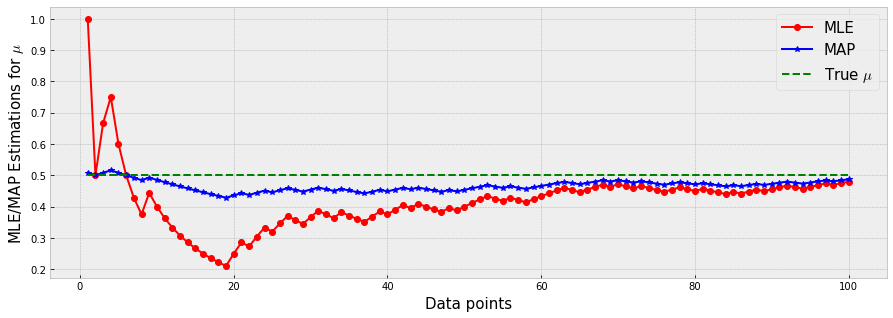

In [6]:
# True value of the unknown parameter
trueMU = 0.5 # 0.5 for a fair coin

# Prior Initial Parameters
a=30 # alpha
b=30 # beta

# Sampling Training Data
Nflips = 100
Outcomes = stats.bernoulli(trueMU).rvs(Nflips)

# Computing MLE and MAP estimates as data is being collected
mu_MLE = []
mu_MAP = []
for i in range(1,Nflips+1):
    mu_MLE += [np.sum(Outcomes[:i])/len(Outcomes[:i])]
    mu_MAP += [(np.sum(Outcomes[:i])+a-1)/(len(Outcomes[:i])+a+b-2)]

# Plotting estimates
plt.figure(figsize=(15,5))
plt.plot(range(1,Nflips+1), mu_MLE, '-or', label='MLE')
plt.plot(range(1,Nflips+1), mu_MAP, '-*b', label='MAP')
plt.plot(range(1,Nflips+1), [trueMU]*Nflips, '--g', label='True $\mu$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\mu$',size=15)
plt.legend(fontsize=15);

___

## Could we update the prior as we receive data?

* What if we could fine-tune the prior probability's parameters ($\alpha$ and $\beta$, in this example) as we see more data?

* Could we use the posterior probability to update the prior probability's parameters? That is, to select new values for $\alpha$ and $\beta$ using a data informative prior?

* What cases would make this possible?

# Conjugate Priors

Two distributions have a **conjugate prior** relationship when the form of the posterior is the same as the form of the prior.

* Do the **Bernoulli-Beta** distributions have a conjugate prior relationship? Yes!

Note that the posterior probability was defined as:

\begin{align*}
P(\mu|\mathbf{x}) &\propto \mu^{\sum_{i=1}^N x_i+\alpha-1} (1-\mu)^{N-\sum_{i=1}^N x_i+\beta-1}
\end{align*}

and, the prior probability (Beta distribution) is:

\begin{align*}
P(\mu|\alpha, \beta) &\propto \mu^{\alpha-1} (1-\mu)^{\beta-1}
\end{align*}

(In both cases, the constant term was disregarded because it will not affect the solution for $\mu$ during optimization).

The **posterior** and the **prior** probability have the same shape, hence they have a **<font color='blue'>conjugate prior</font>** relationship. Moreover, see that the parameters $\alpha$ and $\beta$ are now mapped to:

\begin{align*}
\alpha^{(t+1)} &\leftarrow \alpha^{(t)} + \sum_{i=1}^N x_i\\
\beta^{(t+1)} &\leftarrow \beta^{(t)} + N - \sum_{i=1}^N x_i
\end{align*}

In an online model estimation scenario, where the posterior has the same form as the prior, we can use the posterior as our new prior. This new prior is now data informative and will update it's parameters based on (1) our initial choice, and (2) the data. 

## Pseudo-Code for Online Update of the Prior

1. Iteration $t=0$
2. Initialize the parameters of the prior probability, $\alpha^{(t)}$ and $\beta^{(t)}$
3. As data comes in:
    1. Compute the posterior probability, $\mathcal{L}_{\text{MAP}}^{(t)} = P(\mathbf{x}|\mu)P(\mu|\alpha^{(t)},\beta^{(t)})$
    2. Make an estimate for the parameter, $\mu_{\text{MAP}}^{(t)}$
    3. Update parameters of prior probability:
    \begin{align*}
    \alpha^{(t+1)} &\leftarrow \alpha^{(t)} + \sum_{i=1}^N x_i\\
    \beta^{(t+1)} &\leftarrow \beta^{(t)} + N - \sum_{i=1}^N x_i
    \end{align*}
    4. $t \leftarrow t + 1$

Let's see how we can implement this in code for this working example:

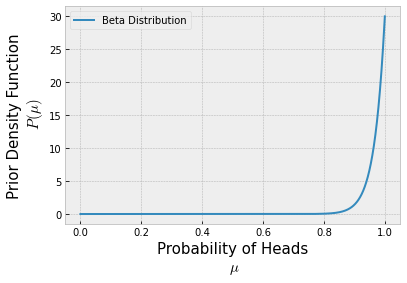

In [7]:
a = 30
b = 1
Beta = stats.beta(a,b)
x = np.linspace(0,1,1000)

plt.plot(x, Beta.pdf(x), label='Beta Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Heads\n $\mu$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\mu)$',fontsize=15);

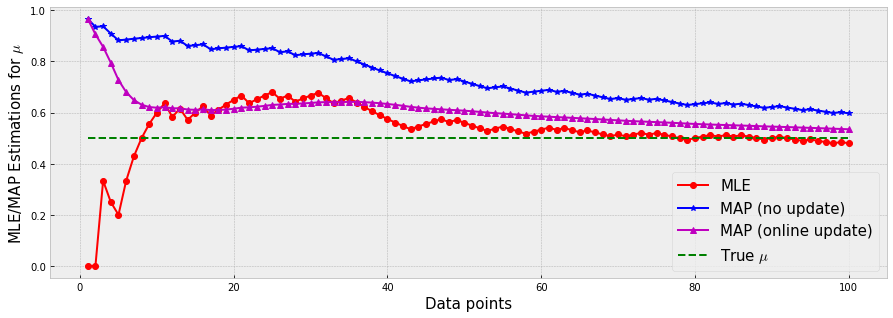

In [8]:
# True value of the unknown parameter
trueMU = 0.5 # 0.5 for a fair coin

# Prior Probability parameters
a = 30; a_init = a
b = 1;  b_init = b

# Sampling Training Data
Nflips = 100
Outcomes = stats.bernoulli(trueMU).rvs(Nflips)

# Computing MLE and MAP estimates as data is being collected
mu_MLE = []
mu_MAP = []
mu_MAP_update = []
for i in range(1,Nflips+1):
    mu_MLE += [np.sum(Outcomes[:i])/len(Outcomes[:i])]
    mu_MAP += [(np.sum(Outcomes[:i])+a_init-1)/(len(Outcomes[:i])+a_init+b_init-2)]
    mu_MAP_update += [(np.sum(Outcomes[:i])+a-1)/(len(Outcomes[:i])+a+b-2)]
    a += np.sum(Outcomes[:i])
    b += len(Outcomes[:i]) - np.sum(Outcomes[:i])

# Plotting estimates
plt.figure(figsize=(15,5))
plt.plot(range(1,Nflips+1), mu_MLE, '-or', label='MLE')
plt.plot(range(1,Nflips+1), mu_MAP, '-*b', label='MAP (no update)')
plt.plot(range(1,Nflips+1), mu_MAP_update, '-^m', label='MAP (online update)')
plt.plot(range(1,Nflips+1), [trueMU]*Nflips, '--g', label='True $\mu$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\mu$',size=15)
plt.legend(fontsize=15);

## Let's now see the effects on the posterior probability

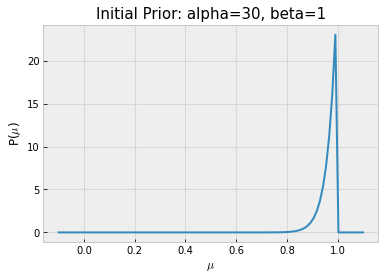

Alpha =  30
Beta =  1


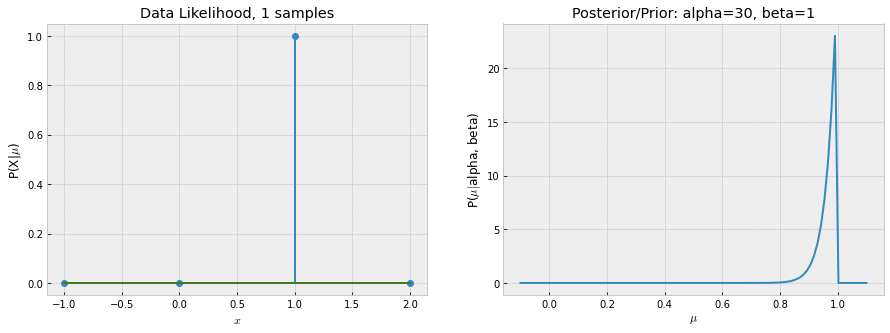

Number of samples:  1
Data:  [1]
MAP estimate mu =  1.0
New alpha =  31
New beta =  1


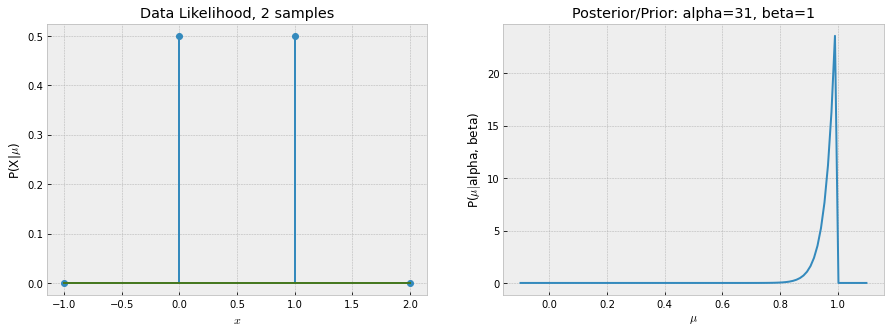

Number of samples:  2
Data:  [1 0]
MAP estimate mu =  0.96875
New alpha =  32
New beta =  2


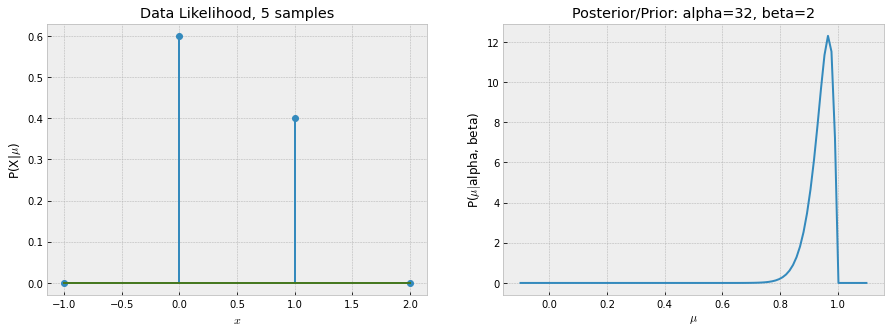

Number of samples:  5
Data:  [1 0 0 1 0]
MAP estimate mu =  0.8918918918918919
New alpha =  34
New beta =  5


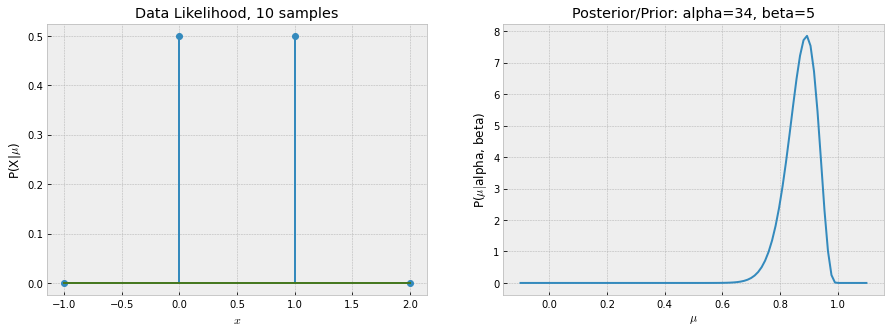

Number of samples:  10
Data:  [1 0 0 1 0 0 0 1 1 1]
MAP estimate mu =  0.8085106382978723
New alpha =  39
New beta =  10


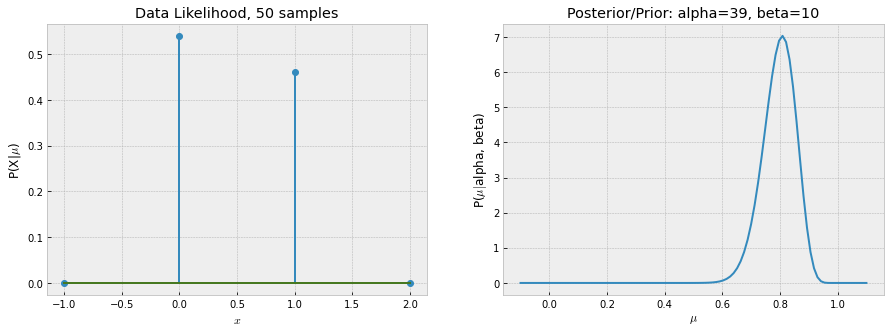

Number of samples:  50
Data:  [1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 1 1]
MAP estimate mu =  0.6288659793814433
New alpha =  62
New beta =  37


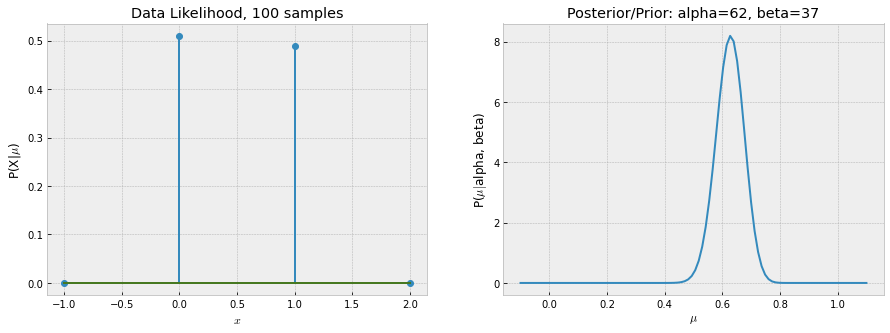

Number of samples:  100
Data:  [1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1]
MAP estimate mu =  0.5583756345177665
New alpha =  111
New beta =  88


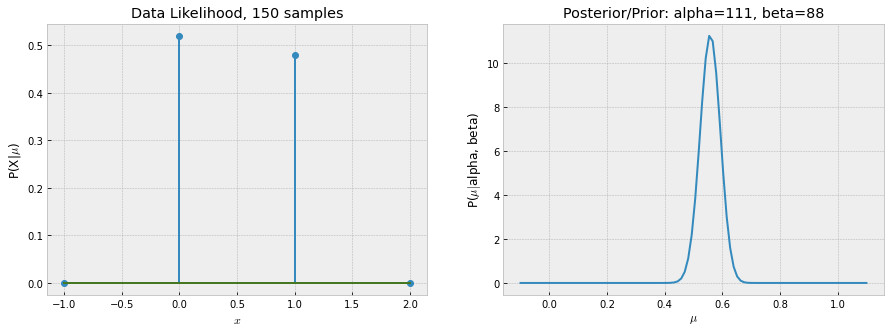

Number of samples:  150
Data:  [1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 0]
MAP estimate mu =  0.5244956772334294
New alpha =  183
New beta =  166


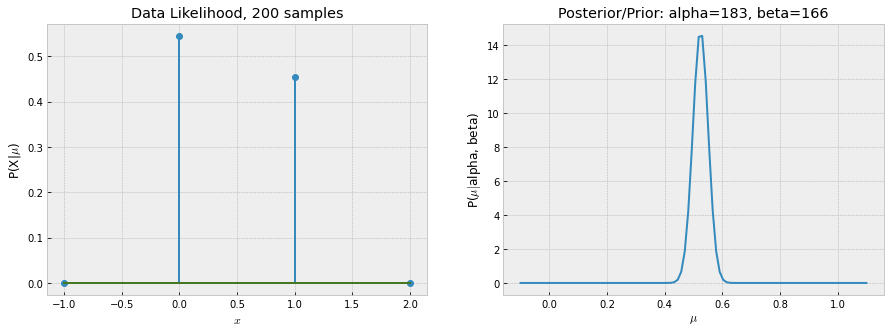

Number of samples:  200
Data:  [1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1]
MAP estimate mu =  0.4990859232175503
New alpha =  274
New beta =  275


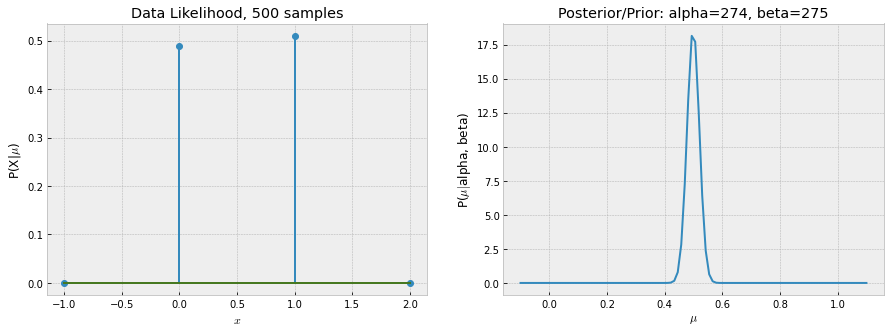

Number of samples:  500
Data:  [1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 

In [9]:
# True value of the unknown parameter
trueMU = 0.5 # 0.5 for a fair coin

# Prior Probability parameters
a = 30; a_init = a
b = 1;  b_init = b

# Plotting data
x = np.linspace(-0.1,1.1,100)
xr = range(-1,3)

# Prior probability, Beta(a,b)
plt.plot(x, stats.beta(a,b).pdf(x))
plt.xlabel('$\mu$'); plt.ylabel('P($\mu$)')
plt.title('Initial Prior: alpha='+str(a)+', beta='+str(b),size=15)
plt.show();

print('Alpha = ', a)
print('Beta = ', b)

Nsamples = [1,2,5,10,50,100,150,200,500]
Outcomes = stats.bernoulli(trueMU).rvs(size=Nsamples[-1])
for i in range(len(Nsamples)):
    Data = Outcomes[:Nsamples[i]]
    
    # Outcomes will have 1's or 0's (1 - Heads, 0 - Tails) 
    estimate_mu = (np.sum(Data)+a-1)/(len(Data)+a+b-2)
    
    # Data Likelihood:
    fig=plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.stem(xr, stats.bernoulli(np.sum(Data)/len(Data)).pmf(xr))
    plt.xlabel('$x$'); plt.ylabel('P(X|$\mu$)'); 
    plt.title('Data Likelihood, '+str(Nsamples[i])+' samples')
    
    # Posterior/Prior:
    fig.add_subplot(1,2,2)
    plt.plot(x, stats.beta(a,b).pdf(x))
    plt.xlabel('$\mu$'); plt.ylabel('P($\mu|$alpha, beta)'); 
    plt.title('Posterior/Prior: alpha='+str(a)+', beta='+str(b))
    plt.show()
    
    # Update Prior distribution
    a += np.sum(Data)
    b += len(Data)-np.sum(Data)
    
    # Print estimate for mu
    print('Number of samples: ', len(Data))
    print('Data: ',Data)
    print('MAP estimate mu = ', estimate_mu)
    print('New alpha = ', a)
    print('New beta = ', b)

___

# Other Conjugate Priors

There are many conjugate prior relationships, some examples include: 
1. Bernoulli-Beta,
2. Gaussian-Gaussian, 
3. Gaussian-Inverse Wishart,
4. Multinomial-Dirichlet,
5. and others.

The [table of conjugate distributions](https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions) is very useful for selecting the prior probability in order to have a conjugate prior relationship for cases when the data likelihood is discrete (such as Bernoulli) or continuous (such as Gaussian).

___

# Review of Gaussian Distribution

(Read [section 2.3 "The Gaussian Distribution"](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) from the Bishop textbook)

## Univariate Gaussian

The Gaussian distribution is a widely used probabilistic model for the probability density function (pdf) of continuous random variables. 

The Gaussian distribution can model both univariate (1-D) or multivariate (multi-dimensional) samples.

In the **univariate** case, the pdf of a Gaussian distribution for a random variable $X\in\mathbb{R}$ can be written as

$$f_X(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right)$$

In this case, we say that $X$ follows a Gaussian distribution with mean $\mu$ and variance $\sigma^2$, or, $X\sim N(\mu,\sigma^2)$.

* We can define the **precision** parameter $\beta$ as the inverse of the variance, that is, $\beta=\frac{1}{\sigma^2}$.

* A Gaussian distribution is called **Normal** when the mean is $\mu=0$ and variance is $\sigma^2=1$, $X\sim N(0,1)$.

In [13]:
from scipy import stats

G1=stats.norm(0,1) # G(0,1^2)

G2=stats.norm(10,3) #G(10,3^2)

G3=stats.norm(-5,0.3) #G(-5, 0.3^2)

G2

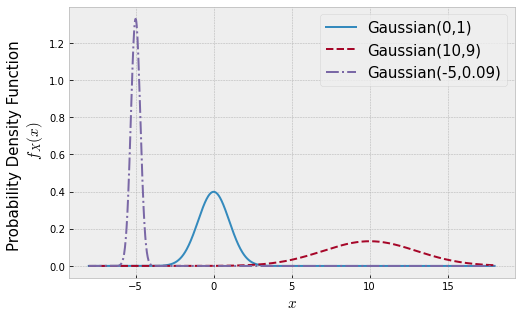

In [12]:
plt.figure(figsize=(8,5))

x=np.linspace(-8,18,1000)
plt.plot(x,G1.pdf(x),label='Gaussian(0,1)')
plt.plot(x,G2.pdf(x),'--',label='Gaussian(10,9)')
plt.plot(x,G3.pdf(x),'-.',label='Gaussian(-5,0.09)')
plt.legend(fontsize=15)
plt.xlabel('$x$',size=15)
plt.ylabel('Probability Density Function \n $f_X(x)$',size=15);

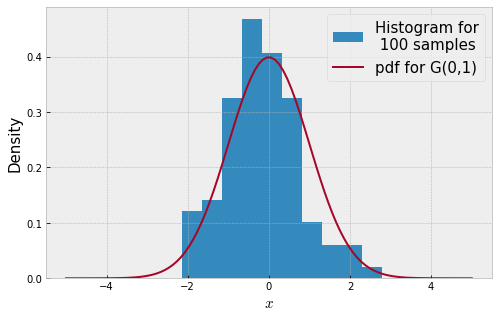

In [14]:
samples=G1.rvs(size=100)

plt.figure(figsize=(8,5))
x=np.linspace(-5,5,100)
plt.hist(samples,density=True, label='Histogram for\n 100 samples')
plt.plot(x, G1.pdf(x), label='pdf for G(0,1)')
plt.legend(fontsize=15)
plt.xlabel('$x$',size=15)
plt.ylabel('Density',size=15);

## Multivariate Gaussian

In the **multivariate** case, the pdf of a Gaussian distribution for a random variable $X\in\mathbb{R}^D$ can be written as

$$f_X(x) = \frac{1}{\sqrt{(2\pi)^d\left|\Sigma\right|}}\exp\left(-\frac{1}{2}\left(\mathbf{x}-\mathbf{\mu}\right)^T\Sigma^{-1}\left(\mathbf{x}-\mathbf{\mu}\right)\right)$$

In this case, we say that $X$ follows a Gaussian distribution with mean $\mu$ and covariance $\Sigma$, or, $X\sim N(\mu,\Sigma)$.

* $\mu$ is a $D$-dimensional mean vector
* $\Sigma$ is a $D\times D$ covariance matrix
* $\left|\Sigma\right|$ denotes the determinant of $\Sigma$
* The precision parameter in a $d$-dimensional space is equal to $\beta = \Sigma^{-1}$

Let $X=[X_1,X_2]$. The **covariance** $\Sigma$ measures the amount of variance is each individual dimension, $X_1$ and $X_2$, as well as the amount of covariance between the two. We can write the covariance as

\begin{align*}
\text{cov}(X_1,X_2) &= E\bigl[\left(X_1-E\left[X_1\right]\right) \left(X_2-E\left[X_2\right]\right)\bigr]\\
&= \left[\begin{array}{cc}\text{var}(X_1) & \text{cov}(X_1,X_2) \\ \text{cov}(X_1,X_2) & \text{var}(X_2)\end{array}\right]\\
&= \left[\begin{array}{cc}\sigma^2_{X_1} & \text{cov}(X_1,X_2) \\ \text{cov}(X_1,X_2) & \sigma^2_{X_2}\end{array}\right]
\end{align*}

* The **Pearson's correlation coefficient** between random variables $X_1$ and $X_2$ is defined as:

$$ r = \frac{\operatorname{cov}(X_1,X_2)}{\sqrt{\text{var}(X_1)}\sqrt{\text{var}(X_2)}} = \frac{\text{cov}(X_1,X_2)}{\sigma_{X_1} \sigma_{X_2}}$$

In [17]:
mu = np.array([0,0]) # mean vector
cov  = np.array([[3,0.5],[0.5,1]]) # covariance matrix
print(cov)
G = stats.multivariate_normal(mu, cov)

[[3.  0.5]
 [0.5 1. ]]


<IPython.core.display.Javascript object>


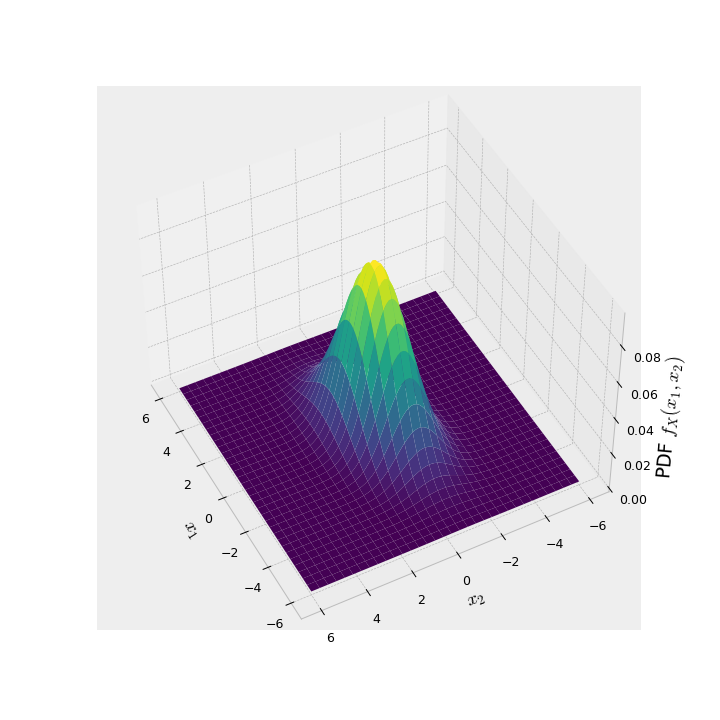

In [18]:
x, y = np.mgrid[-6:6:100j, -6:6:100j]
xy = np.column_stack([x.flat, y.flat])
z = stats.multivariate_normal.pdf(xy, mean=mu, cov=cov)
z = z.reshape(x.shape)

%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=plt.cm.viridis)
ax.set_xlabel('$x_1$',size=15)
ax.set_ylabel('$x_2$',size=15)
ax.set_zlabel('PDF $f_X(x_1,x_2)$',size=15);

Let's use the Mathematica's demonstration ["Joint Density of Bivariate Gaussian Random Variables"](https://demonstrations.wolfram.com/JointDensityOfBivariateGaussianRandomVariables/) to better understand the role of the covariance matrix.

---

# (Univariate) Gaussian-Gaussian Conjugate Prior

Consider the data likelihood $P(\mathbf{x}|\mu) \sim \mathcal{N}(\mu, \sigma^2)$ and the prior distribution $P(\mu) \sim \mathcal{N}(\mu_0,\sigma_0^2)$. The posterior probability will also be Gaussian-distributed:
    
\begin{align*}
P(\mu|\mathbf{x}) \sim \mathcal{N}\left(\frac{\sum_{i=1}^N x_i\sigma_0^2 + \mu_0\sigma^2}{N\sigma_0^2+\sigma^2},\left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right)^{-1}\right)
\end{align*}

Proof: 

\begin{align*}
P(\mu|\mathbf{x}) &\propto P(\mathbf{x}|\mu)P(\mu) \\
& = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2}\frac{(x_i-\mu)^2}{\sigma^2}\right)\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\frac{(\mu-\mu_0)^2}{\sigma_0^2}\right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(\sum_{i=1}^N \left(-\frac{1}{2}\frac{(x_i-\mu)^2}{\sigma^2}\right) -\frac{1}{2}\frac{(\mu-\mu_0)^2}{\sigma_0^2} \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\left(\sum_{i=1}^N \frac{(x_i-\mu)^2}{\sigma^2} +\frac{(\mu-\mu_0)^2}{\sigma_0^2} \right) \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2}\left(\frac{\sum_{i=1}^N x_i^2-2\sum_{i=1}^N x_i\mu +\mu^2N)}{\sigma^2} +\frac{\mu^2-2\mu\mu_0 +\mu_0^2}{\sigma_0^2} \right) \right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2} \left(\frac{\mu^2N}{\sigma^2}+\frac{\mu^2}{\sigma_0^2}\right) - 2\mu \left( \frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) + \frac{\sum_{i=1}^N x_i^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right) \\
&=  \frac{1}{\sqrt{2\pi\sigma^2}}\frac{1}{\sqrt{2\pi\sigma_0^2}}\exp\left(-\frac{1}{2} \left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right) \left(\mu^2 - 2\mu\left(\frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right)\left(\frac{N}{\sigma^2}+\frac{1}{\sigma_0^2}\right)^{-1} \right) \right) \exp\left(\frac{\sum_{i=1}^N x_i}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right)\\
&= \dots
\end{align*}

___

# (Multivariate) Gaussian-Gaussian

Let the multivariate Gaussian data likelihood with $D$-dimensions with mean $\mu$ and covariance $\beta\mathbf{I}$ and a multivariate Gaussian 


prior distribution with mean $\mu_0$ and covariance $\Sigma_0$.

\begin{align*}
P(\mathbf{t}|\mathbf{w}) &\sim \mathcal{N}(\mathbf{\mu}, \beta\mathbf{I}) \\
P(\mathbf{w}) &\sim \mathcal{N}(\mathbf{\mu}_0,\Sigma_0)
\end{align*}

The posterior distribution

\begin{align*}
P(\mathbf{w}|\mathbf{t}) &\sim \mathcal{N}\left(\mathbf{\mu}_N, \Sigma_N\right) \\
\mathbf{\mu}_N &= \Sigma_N \left(\Sigma_0^{-1}\mathbf{\mu}_0+\beta\mathbf{\mathbf{X}}^T\mathbf{t}\right)\\
\Sigma_N^{-1} &= \Sigma_0^{-1} + \beta \mathbf{\mathbf{X}}^T\mathbf{\mathbf{X}}
\end{align*}

where $\mathbf{X}$ is the feature matrix of size $N \times M$.

* What happens with different values of $\beta$ and $\Sigma_0$?

To simplify, let's assume the covariance of prior is **isotropic**, that is, it is a diagonal matrix with the same value along the diagonal, $\Sigma_0 = \alpha^{-1}\mathbf{I}$. And, let also $\mathbf{\mu}_0 = [0,0]$, thus 

\begin{align*}
\mu_N = \beta \Sigma_N\mathbf{X}^T\mathbf{t}
\end{align*}

and

\begin{align*}
\Sigma_N = \left(\alpha^{-1}\mathbf{I} + \beta \mathbf{X}^T\mathbf{X}\right)^{-1}
\end{align*}

___

## Another Example of Online Updating of the Prior using Conjugate Priors (Multivariate Gaussian-Gaussian)

Let's consider the example presented in the Bishop textbook (Figure 3.7 in page 155).

Consider a single input variable $\mathbf{x}$, a single target variable $\mathbf{t}$ and a linear model of the form $y(\mathbf{x},\mathbf{w}) = w_0 + w_1\mathbf{x}$.
Because this has just two parameters coefficients, $w=[w_0, w_1]^T$, we can plot the prior and posterior distributions directly in parameter space (2-dimensional parameter space).

to be continued next class...

---